## Dimensionality Reduction

### Principal Component Analysis


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Wine.csv')
df
X = df.iloc[:, :13].values
y = df.iloc[:, 13].values

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
# Always scale data for good results on PCA
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
print (explained_variance_ratio)

[0.37792643 0.19733099 0.11678246 0.06679524 0.05457781 0.0474704
 0.03727354 0.0259498  0.02113186 0.0194285  0.01660145 0.0115734
 0.00715814]


In [10]:
var1 = np.cumsum(np.round(explained_variance_ratio,decimals = 4)*100)
var1

array([ 37.79,  57.52,  69.2 ,  75.88,  81.34,  86.09,  89.82,  92.41,
        94.52,  96.46,  98.12,  99.28, 100.  ])

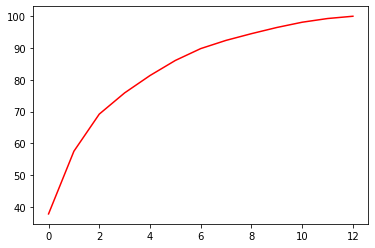

In [11]:
plt.plot(var1,color="red")


In [13]:
# Extract top 2 principal components

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print (explained_variance)

[0.65696924 0.34303076]


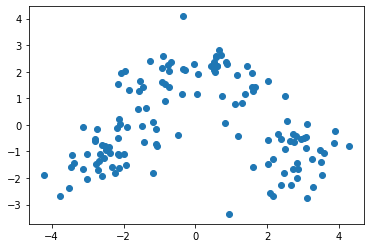

In [21]:
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train])
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

C:\Users\varun\Anacond\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anacond\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  2,  0],
       [ 1, 17,  0],
       [ 0,  0, 11]], dtype=int64)

In [17]:
clf.score(X_test, y_test)

0.9333333333333333